**Pima Indians Diabetes Database**

**Preprocessing**

In [11]:
import tensorflowjs as tfjs
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import np_utils

In [2]:
print(tensorflow.__version__)

1.14.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("pima_indian_data.csv")
#df = df.drop('Unnamed: 0', axis=1)
df.head()
# print(df.shape)
# print(df.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#df.to_csv("pima.csv", index=False)

**Data Visualization**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

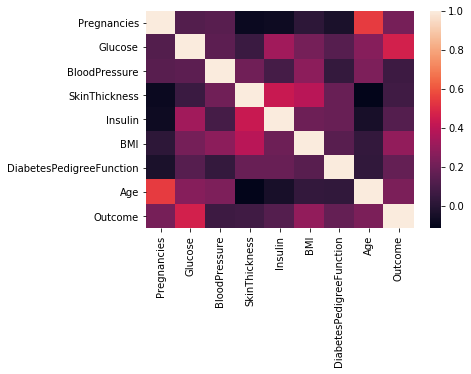

In [6]:
import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Deep Learning**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis = 1).values
Y = df['Outcome']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
# Initialize the constructor
model = tf.keras.Sequential([
  tf.keras.layers.Dense(13, activation='relu', input_shape=(8,)),  # must declare input shape
  tf.keras.layers.Dense(60, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])
# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 13)                117       
_________________________________________________________________
dense_11 (Dense)             (None, 60)                840       
_________________________________________________________________
dense_12 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 3,108
Trainable params: 3,108
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_Train, Y_Train,epochs=100, batch_size=256)

Epoch 1/100
537/537 [==============================] - 0s 221us/sample - loss: 1.7429 - acc: 0.5475
Epoch 2/100
537/537 [==============================] - 0s 11us/sample - loss: 0.8549 - acc: 0.5251
Epoch 3/100
537/537 [==============================] - 0s 11us/sample - loss: 0.7022 - acc: 0.6220
Epoch 4/100
537/537 [==============================] - 0s 13us/sample - loss: 0.7793 - acc: 0.6872
Epoch 5/100
537/537 [==============================] - 0s 17us/sample - loss: 0.7641 - acc: 0.6927
Epoch 6/100
537/537 [==============================] - 0s 11us/sample - loss: 0.7531 - acc: 0.6927
Epoch 7/100
537/537 [==============================] - 0s 15us/sample - loss: 0.5988 - acc: 0.7039
Epoch 8/100
537/537 [==============================] - 0s 13us/sample - loss: 0.5880 - acc: 0.6946
Epoch 9/100
537/537 [==============================] - 0s 17us/sample - loss: 0.5763 - acc: 0.7076
Epoch 10/100
537/537 [==============================] - 0s 15us/sample - loss: 0.5647 - acc: 0.7095
Epoch 11

537/537 [==============================] - 0s 15us/sample - loss: 0.4383 - acc: 0.7821
Epoch 84/100
537/537 [==============================] - 0s 17us/sample - loss: 0.4344 - acc: 0.7821
Epoch 85/100
537/537 [==============================] - 0s 19us/sample - loss: 0.4312 - acc: 0.7784
Epoch 86/100
537/537 [==============================] - 0s 13us/sample - loss: 0.4306 - acc: 0.7821
Epoch 87/100
537/537 [==============================] - 0s 13us/sample - loss: 0.4314 - acc: 0.7747
Epoch 88/100
537/537 [==============================] - 0s 13us/sample - loss: 0.4343 - acc: 0.7840
Epoch 89/100
537/537 [==============================] - 0s 11us/sample - loss: 0.4552 - acc: 0.7784
Epoch 90/100
537/537 [==============================] - 0s 19us/sample - loss: 0.4317 - acc: 0.7821
Epoch 91/100
537/537 [==============================] - 0s 9us/sample - loss: 0.4290 - acc: 0.7840
Epoch 92/100
537/537 [==============================] - 0s 11us/sample - loss: 0.4346 - acc: 0.7840
Epoch 93/100
5

In [25]:
# over the training set
y_pred=model.predict_classes(X_Train)
print(confusion_matrix(Y_Train, y_pred))
print(classification_report(Y_Train, y_pred))

[[328  22]
 [ 99  88]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       350
           1       0.80      0.47      0.59       187

   micro avg       0.77      0.77      0.77       537
   macro avg       0.78      0.70      0.72       537
weighted avg       0.78      0.77      0.76       537



In [26]:
# over the test set
y_pred=model.predict_classes(X_Test)
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

[[138  12]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       150
           1       0.77      0.51      0.61        81

   micro avg       0.77      0.77      0.77       231
   macro avg       0.77      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



In [27]:
tfjs.converters.save_keras_model(model, 'modelready')